# Importing All Necessary Libraries (e.g pandas & np)
# & Setting values for Max column 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 73)
import numpy as np
import math
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

# Reading CSV Files into Dataframe

In [2]:
df  = pd.read_csv('students_responses_main.csv')
df_org = df.copy()
df

,Timestamp,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Kindly select your father's education from these options.,Kindly select your mother's education from these options.,Please select your father/guardian monthly Income from these options.,"If you are self-supporting then please specify e.g. Freelancing, Teaching, part-time job, etc.",Please select your monthly Income ?,Please enter your Subjects GPA which you have studied? (CS) [Object Oriented Programming],Please enter your Subjects GPA which you have studied? (CS) [Programming Fundamentals C],Please enter your Subjects GPA which you have studied? (SE) [Software Requirement Engineering],Please enter your Subjects GPA which you have studied? (SE) [Software Design and Architecture],Please enter your Subjects GPA which you have studied? (SE) [Software Project Management],Please enter your Subjects GPA which you have studied? (SE) [Software Quality Engineering],Please enter your Subjects GPA which you have studied? (SE) [Software Testing],Please enter your Subjects GPA which you have studied? (SE) [Design Patterns],Please enter your Subjects GPA which you have studied? (SE) [Software Construction],Please enter your Subjects GPA which you have studied? (SE) [Introduction to Software Engineering (ISE)],Please enter your Subjects GPA which you have studied? (CS) [Introduction to ICT],Please enter your Subjects GPA which you have studied? (CS) [Discrete Structures],Please enter your Subjects GPA which you have studied? (CS) [Professional Practices of IT (PPIT)],Please enter your Subjects GPA which you have studied? (SE) [Formal Methods],Please enter your Subjects GPA which you have studied? (CS) [Data Structures and Algorithms (DSA)],Please enter your Subjects GPA which you have studied? (CS) [Software Engineering Concepts],Please enter your Subjects GPA which you have studied? (CS) [Microprocessor and Assembly Language],Please enter your Subjects GPA which you have studied? (CS) [Database Systems ],Please enter your Subjects GPA which you have studied? (CS) [Digital image processing (DIP)],Please enter your Subjects GPA which you have studied? (CS) [Design and Analysis of Algorithm Semantic Web],Please enter your Subjects GPA which you have studied? (CS) [Operating Systems (OS)],Please enter your Subjects GPA which you have studied? (CS) [Computer Communication and Networks (CCN)],Please enter your Subjects GPA which you have studied? (CS) [Computer Graphics],Please enter your Subjects GPA which you have studied? (CS) [Numerical Computing],Please enter your Subjects GPA which you have studied? (CS) [Web Technologies],Please enter your Subjects GPA which you have studied? (CS) [Human Computer Interaction (HCI)],Please enter your Subjects GPA which you have studied? (CS) [Game Development],Please enter your Subjects GPA which you have studied? (CS) [Theory of Automata],Please enter your Subjects GPA which you have studied? (CS) [Data Security and Encryption],Please enter your Subjects GPA which you have studied? (CS) [Mobile Application Development],Please enter your Subjects GPA which you have studied? (CS) [Artificial Intelligence],Please enter your Subjects GPA which you have studied? (CS) [Processor and Assembly Language],Please enter your Subjects GPA which you have studied? (CS) [Compiler Construction],Please enter your Subjects GPA which you have studied? (CS) [Machine Learning],Please enter your Subjects GPA which you have studied? (CS) [Information Security],Please enter your Subjects GPA which you have studied? (CS) [Software Process Improvement],Please enter your Subjects GPA which you have studied? (CS) [Computer Vision],Please enter your Subjects GPA which you have studied? (CS) [Introduction to Data Science],Please mention your Previous Semester GPA?,Your matric marks percentage?,Did you get any scholarship

# Removing the columns that were not useful (i.e. GPA of each course)

In [3]:
df.drop(columns= df.columns[88],inplace=True)
df.drop(columns= df.columns[74],inplace=True)
df.drop(columns= df.columns[58],inplace=True)
df.drop(columns = df.columns[12:50],inplace = True)
df.drop(columns= df.columns[10],inplace=True)
df.drop(columns= df.columns[8],inplace=True)
df.drop(columns= df.columns[7],inplace=True)
df.drop(columns= df.columns[0],inplace=True)

# Replacing Semesters

In [4]:
df['Kindly choose your current semester.']=df['Kindly choose your current semester.'].str.replace('2 Semester','1 Semester',regex=True).str.replace('3 Semester','2 Semester',regex=True) .str.replace ('4 Semester','3 Semester',regex=True).str.replace ('5 Semester','4 Semester',regex=True).str.replace ('6 Semester','5 Semester',regex=True).str.replace('7 Semester','6 Semester',regex=True).str.replace('8 Semester','7 Semester',regex=True) 

# Correcting Matric & FSC Marks Columns (e.g into percentage[%])

In [5]:

df['Your matric marks percentage?'] = np.where(df['Your matric marks percentage?'] > 100,
                                               df['Your matric marks percentage?'] * 100 / 1100,
                                               df['Your matric marks percentage?'])


df["Your Fsc/Ics marks percentage?"] = np.where(df["Your Fsc/Ics marks percentage?"] > 100,
                                                df["Your Fsc/Ics marks percentage?"]* 100/1100,
                                                df["Your Fsc/Ics marks percentage?"])

# All decimals Upto 2 (e.g 2.2141 to 2.21)

In [6]:
df.round(decimals =2)

,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Did you get any scholarship from school?,What you did previously in intermediate?,Your Fsc/Ics marks percentage?,Are you getting scholarship from College?,Please mention your NTS score?,Please mention what's your program?,How much you have interest in this domain,Are you satisfied with your program selection?,Kindly choose your current semester.,Please provide your current CGPA?,Are you getting scholarship from university?,Are you paying your fees?,Please specify your mode of study?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,Do you have any certificate or diploma in a specific subject? Kindly mention the subject if you have any.,"Kindly tell us, how often do you visit library?","Please choose, what do you prefer in studies?",Do you borrow a book from Library?,"Do you take help from online lectures or tutorials outside university resources? e.g. YouTube, Udemy, Coursera","Please select, how much time you spend on study in a day?",How is your health,"Kindly specify, do you have any disability?","Please select, how much free time do you have per day?",Do you like your teacher methodology,"Please select, how much time do you go out with friend and family?",How much it takes time to reach university?,"Kindly select, how much time you spend on physical exercise e.g., gym, sports, running etc. ?",Kindly specify do you love travelling?,Where you love to eat?,Do you love to participate in co-curricular activities in university?,Do you love to study in a group?,Do you love reading books?,Do you love to socialize with other?,"Please select, how much time do you spend in the above activity in a day.",What is the quality of relationships among your family members?,Do you have internet access easily?,Please select your learning speed?,Kindly tell us does your family supports you in education?,Do you feel any risk of failing to Graduate in your degree?,"Please specify, what do you think abilities you have ? [Self-Discipline]","Please specify, what do you think abilities you have ? [Hard Working]","Please specify, what do you think abilities you have ? [Punctual]","Please specify, what do you think abilities you have ? [Polite]","Please specify, what do you think abilities you have ? [Team Player]","Please specify, what do you think abilities you have ? [Confident]","Please specify, what do you think abilities you have ? [Responsible]",Do you think getting good grades are important?,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,Male,19,5,Own House,Other,Father,Between 75k to 100k,Between 10k to 25k,2.60,90.00,Yes,ICS (Physics),70.0,Yes,70.0,Software Engineering,4.0,4,5 Semester,2.60,No,Yes,Full-time,3,3,No certificate,Sometimes,Physical mode,Never,Always,Between 1 to 2 hours,3.0,No,Between 2 to 3 hours,3.0,Less than 1 hour,Less than 20 minutes,Less,4,Outside,Rarely,Rarely,3,Sometimes,Between 2 to 3 hours,Good,Always,Good,Always,Never,Moderate,Moderate,Moderate,Extremely,Extreme

# Removing Outliars 

<h3> Check before Removing Outliars </h3>

In [7]:
df.describe()

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,636.000000,643.000000,643.000000,643.000000,643.000000,640.000000,640.000000,643.000000,643.000000
mean,20.371695,5.928460,3.009611,86.826523,81.505692,76.205941,3.869497,3.723173,2.976409,3.321928,3.225505,3.725000,3.151562,4.000000,2.970451
std,2.505497,4.390004,4.386389,10.362734,29.511367,23.514766,1.069379,1.167262,3.883473,1.012662,1.041433,1.062669,1.060235,1.197089,1.317530
min,17.000000,1.000000,0.000100,0.100000,0.100000,0.100000,1.000000,1.000000,0.000010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.500000,84.000000,75.000000,72.000000,3.000000,3.000000,2.600000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.830000,89.000000,82.000000,79.000000,4.000000,4.000000,2.890000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.200000,92.000000,86.000000,84.000000,5.000000,5.000000,3.160000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,69.000000,108.000000,100.000000,100.000000,788.909091,420.000000,5.000000,5.000000,100.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<h3> 15% Remove from top and bottom  </h3> 

In [8]:
Q1 = df.quantile(0.15)
Q3 = df.quantile(0.85)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\hppav\AppData\Local\Temp\ipykernel_5504\1640112028.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<h3> Check After Removing Outliars </h3>

In [9]:
df.describe()

,Kindly mention your age?,How many members are in your family?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Your Fsc/Ics marks percentage?,Please mention your NTS score?,How much you have interest in this domain,Are you satisfied with your program selection?,Please provide your current CGPA?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,How is your health,Do you like your teacher methodology,Kindly specify do you love travelling?,Do you love reading books?
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,570.000000,576.000000,576.000000,576.000000,576.000000,573.000000,573.000000,576.000000,576.000000
mean,20.291667,5.663194,2.844132,87.407890,80.099607,79.042917,3.877193,3.720486,2.890295,3.319444,3.222222,3.727749,3.136126,3.996528,2.960069
std,1.466733,1.365831,0.541953,6.209160,8.396338,8.306247,1.038286,1.131370,0.460065,0.994963,1.012578,1.025487,1.021946,1.178055,1.304228
min,17.000000,2.000000,0.540000,60.000000,50.000000,45.000000,1.000000,1.000000,1.150000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,5.000000,2.550000,84.000000,75.000000,73.000000,3.000000,3.000000,2.640000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,20.000000,6.000000,2.850000,89.000000,81.000000,79.000000,4.000000,4.000000,2.900000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,21.000000,6.000000,3.200000,92.000000,85.625000,85.000000,5.000000,5.000000,3.162500,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,26.000000,11.000000,4.000000,99.090909,99.181800,110.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Factorizing Data i.e. Converting to numeric (Male [1] & Female[0])

In [10]:
def factorize_fun(df):
    obj_cols = df.loc[:, df.dtypes == object].columns
    for col in obj_cols:
        df[col] = pd.factorize(df[col])[0] +1

    return df

df=factorize_fun(df)
df

C:\Users\hppav\AppData\Local\Temp\ipykernel_5504\3363677604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.factorize(df[col])[0] +1


,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Please mention your Previous Semester GPA?,Your matric marks percentage?,Did you get any scholarship from school?,What you did previously in intermediate?,Your Fsc/Ics marks percentage?,Are you getting scholarship from College?,Please mention your NTS score?,Please mention what's your program?,How much you have interest in this domain,Are you satisfied with your program selection?,Kindly choose your current semester.,Please provide your current CGPA?,Are you getting scholarship from university?,Are you paying your fees?,Please specify your mode of study?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,Do you have any certificate or diploma in a specific subject? Kindly mention the subject if you have any.,"Kindly tell us, how often do you visit library?","Please choose, what do you prefer in studies?",Do you borrow a book from Library?,"Do you take help from online lectures or tutorials outside university resources? e.g. YouTube, Udemy, Coursera","Please select, how much time you spend on study in a day?",How is your health,"Kindly specify, do you have any disability?","Please select, how much free time do you have per day?",Do you like your teacher methodology,"Please select, how much time do you go out with friend and family?",How much it takes time to reach university?,"Kindly select, how much time you spend on physical exercise e.g., gym, sports, running etc. ?",Kindly specify do you love travelling?,Where you love to eat?,Do you love to participate in co-curricular activities in university?,Do you love to study in a group?,Do you love reading books?,Do you love to socialize with other?,"Please select, how much time do you spend in the above activity in a day.",What is the quality of relationships among your family members?,Do you have internet access easily?,Please select your learning speed?,Kindly tell us does your family supports you in education?,Do you feel any risk of failing to Graduate in your degree?,"Please specify, what do you think abilities you have ? [Self-Discipline]","Please specify, what do you think abilities you have ? [Hard Working]","Please specify, what do you think abilities you have ? [Punctual]","Please specify, what do you think abilities you have ? [Polite]","Please specify, what do you think abilities you have ? [Team Player]","Please specify, what do you think abilities you have ? [Confident]","Please specify, what do you think abilities you have ? [Responsible]",Do you think getting good grades are important?,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,1,19,5,1,1,1,1,1,2.60,90.00,1,1,70.0,1,70.0,1,4.0,4,1,2.60,1,1,1,3,3,1,1,1,1,1,1,3.0,1,1,3.0,1,1,1,4,1,1,1,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,19,3,1,2,2,2,1,2.80,89.00,1,2,83.0,1,72.0,1,5.0,5,1,2.50,1,1,1,3,3,2,1,1,2,2,2,4.0,1,2,3.0,2,2,1,5,1,2,2,4,2,2,2,1,2,1,2,1,2,1,2,2,2,2,2,1,2,1,2,2,1,2,2,2,1
2,2,19,5,1,2,2,3,2,2.69,91.00,2,1,83.0,2,82.0,1,4.0,4,1,2.62,1,1,1,4,4,1,2,1,3,1,3,3.0,1,3,2.0,2,2,2,5,1,2,3,5,1,3,3,1,1,1,2,2,1,2,1,1,1,1

# Changing Null Values with Knn Imputer with second neighbour.

In [11]:
from sklearn.impute import KNNImputer
        
def knn_null(df):
    imputer = KNNImputer(n_neighbors=2)
    df1 = imputer.fit_transform(df)
    df2 = pd.DataFrame(df1, columns = df.columns)
    return df2

df=knn_null(df)

# Separating Features and Target Column

<h3> Input Columns (X) </h3>

In [12]:
X = df.drop(columns =['Please mention your Previous Semester GPA?'])
X

,Kindly specify your Gender?,Kindly mention your age?,How many members are in your family?,Please specify where are you currently living?,Please mention your parents status?,Kindly tell us about your guardian.,Please select your father/guardian monthly Income from these options.,Please select your monthly Income ?,Your matric marks percentage?,Did you get any scholarship from school?,What you did previously in intermediate?,Your Fsc/Ics marks percentage?,Are you getting scholarship from College?,Please mention your NTS score?,Please mention what's your program?,How much you have interest in this domain,Are you satisfied with your program selection?,Kindly choose your current semester.,Please provide your current CGPA?,Are you getting scholarship from university?,Are you paying your fees?,Please specify your mode of study?,Do you find your CS/SE subjects difficult?,Do you love your subjects?,Do you have any certificate or diploma in a specific subject? Kindly mention the subject if you have any.,"Kindly tell us, how often do you visit library?","Please choose, what do you prefer in studies?",Do you borrow a book from Library?,"Do you take help from online lectures or tutorials outside university resources? e.g. YouTube, Udemy, Coursera","Please select, how much time you spend on study in a day?",How is your health,"Kindly specify, do you have any disability?","Please select, how much free time do you have per day?",Do you like your teacher methodology,"Please select, how much time do you go out with friend and family?",How much it takes time to reach university?,"Kindly select, how much time you spend on physical exercise e.g., gym, sports, running etc. ?",Kindly specify do you love travelling?,Where you love to eat?,Do you love to participate in co-curricular activities in university?,Do you love to study in a group?,Do you love reading books?,Do you love to socialize with other?,"Please select, how much time do you spend in the above activity in a day.",What is the quality of relationships among your family members?,Do you have internet access easily?,Please select your learning speed?,Kindly tell us does your family supports you in education?,Do you feel any risk of failing to Graduate in your degree?,"Please specify, what do you think abilities you have ? [Self-Discipline]","Please specify, what do you think abilities you have ? [Hard Working]","Please specify, what do you think abilities you have ? [Punctual]","Please specify, what do you think abilities you have ? [Polite]","Please specify, what do you think abilities you have ? [Team Player]","Please specify, what do you think abilities you have ? [Confident]","Please specify, what do you think abilities you have ? [Responsible]",Do you think getting good grades are important?,Please fill the form. [Do you take nutritions.],Please fill the form. [Do you love sports?],Please fill the form. [Do you value and have confidence of your opinions?],Please fill the form. [Do you take enough sleep? (7-8 hours)],Please fill the form. [Do you do self-directed learning?],Please fill the form. [Do you have depression of study?],Please fill the form. [Do you have believe that you will be succeed in semester in which you are studying.],Please fill the form. [Are atmospheric conditions such as high temperature and humidity tend you to lower mental efficiency.],Please fill the form. [Do you do planning for study?],Please fill the form. [how often you are regular in doing same thing? (any task)]
0,1.0,19.0,5.0,1.0,1.0,1.0,1.0,1.0,90.00,1.0,1.0,70.0,1.0,70.0,1.0,4.0,4.0,1.0,2.60,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,19.0,3.0,1.0,2.0,2.0,2.0,1.0,89.00,1.0,2.0,83.0,1.0,72.0,1.0,5.0,5.0,1.0,2.50,1.0,1.0,1.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,2.0,3.0,2.0,2.0,1.0,5.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0

<h2> Target (y) into three Classes </h2>

In [13]:
conditions = [
    (df['Please mention your Previous Semester GPA?'] < 2.3),
    (df['Please mention your Previous Semester GPA?'] >= 2.3) & (df['Please mention your Previous Semester GPA?'] < 3),
    (df['Please mention your Previous Semester GPA?'] >= 3)
]

values = ['Bad-Marks', 'Avg-Marks', 'Good-Marks']

df['Results'] = np.select(conditions, values)

y=df['Results']
y=pd.DataFrame(y)
y

,Results
0,Avg-Marks
1,Avg-Marks
2,Avg-Marks
3,Avg-Marks
4,Good-Marks
...,...
571,Avg-Marks
572,Good-Marks
573,Good-Marks
574,Avg-Marks


# Value Counts (y)

In [14]:
y.value_counts()

Results   
Avg-Marks     263
Good-Marks    238
Bad-Marks      75
dtype: int64

# Using SMOTE Oversampling for Increasing Data(Not Using)

In [15]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fitresample(X, y)

In [16]:
y.value_counts()

Results   
Avg-Marks     263
Good-Marks    238
Bad-Marks      75
dtype: int64

# Normalizing Dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler
def normalize(df):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(df)
    return data_scaled

# X=normalize(X)

# Splitting Dataset into Train and Test

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# Applying Models
<h3> 1) Random Forest Classifer </h3>
<h3> 2) Decision Tree Classifer</h3>
<h3> 3) Logistic Regression Classifier </h3>
<h3> 4) MLP Classifer </h3>
<h3> 5) Support Vector Classifer </h3>
<h3> 6) Knn Classifier </h3>
<h3> 7) Naive Bayes Classifer </h3>

# Random Forest Classifier

              precision    recall  f1-score   support

   Avg-Marks       0.61      0.91      0.74        47
   Bad-Marks       1.00      0.05      0.09        22
  Good-Marks       0.91      0.87      0.89        47

    accuracy                           0.73       116
   macro avg       0.84      0.61      0.57       116
weighted avg       0.81      0.73      0.68       116



<AxesSubplot:>

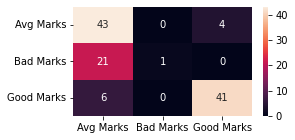

In [19]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_features='sqrt', n_estimators=90, max_depth=8, criterion='gini')
RF.fit(X_train, y_train.values.ravel())

y_pred = RF.predict(X_test)

print(metrics.classification_report(y_test,y_pred))
df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']],
                  columns = [i for i in [  'Avg Marks','Bad Marks','Good Marks']])
plt.figure(figsize = (4,2))
sn.heatmap(df_cm, annot=True, fmt='g')

# Cross Validation with Shuffle Split 10

In [20]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(RandomForestClassifier(max_features='sqrt', n_estimators=90, max_depth=8, criterion='gini'),X,y.values.ravel(),scoring='f1_macro',cv=cv)).mean()

0.6399169448515997

In [21]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(RandomForestClassifier(max_features='sqrt', n_estimators=90, max_depth=8, criterion='gini'),X,y.values.ravel(),scoring='accuracy',cv=cv)).mean()

0.7853448275862067

# Decision Tree Classifier

              precision    recall  f1-score   support

   Avg-Marks       0.84      0.87      0.85        47
   Bad-Marks       0.94      0.77      0.85        22
  Good-Marks       0.90      0.94      0.92        47

    accuracy                           0.88       116
   macro avg       0.89      0.86      0.87       116
weighted avg       0.88      0.88      0.88       116



<AxesSubplot:>

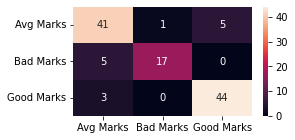

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_leaf_nodes=3, min_samples_split= 2)
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']],
                  columns = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']])
plt.figure(figsize = (4,2))
sn.heatmap(df_cm, annot=True, fmt='g')


# Cross Validation with Shuffle Split 10

In [23]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(DecisionTreeClassifier(max_leaf_nodes=3, min_samples_split= 2),X,y.values.ravel(),scoring='f1_macro',cv=cv)).mean()

0.8320857060594143

In [24]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(DecisionTreeClassifier(max_leaf_nodes=3, min_samples_split= 2),X,y.values.ravel(),scoring='accuracy',cv=cv)).mean()

0.8560344827586206

# Logistic Regression (for Classification)

              precision    recall  f1-score   support

   Avg-Marks       0.62      0.83      0.71        47
   Bad-Marks       1.00      0.32      0.48        22
  Good-Marks       0.83      0.81      0.82        47

    accuracy                           0.72       116
   macro avg       0.82      0.65      0.67       116
weighted avg       0.78      0.72      0.71       116



<AxesSubplot:>

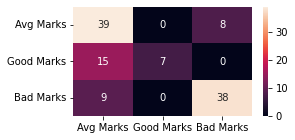

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=10000)
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in ['Avg Marks','Good Marks','Bad Marks']],
                  columns = [i for i in ['Avg Marks','Good Marks','Bad Marks']])
plt.figure(figsize = (4,2))
sn.heatmap(df_cm, annot=True, fmt='g')



# Cross Validation with Shuffle Split 10

In [26]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(LogisticRegression(max_iter=10000),X,y.values.ravel(),scoring='f1_macro',cv=cv)).mean()

0.5922520131186129

In [27]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(LogisticRegression(max_iter=10000),X,y.values.ravel(),scoring='accuracy',cv=cv)).mean()

0.6853448275862071

# MLP Classifier

              precision    recall  f1-score   support

   Avg-Marks       0.56      0.68      0.62        47
   Bad-Marks       0.89      0.36      0.52        22
  Good-Marks       0.68      0.72      0.70        47

    accuracy                           0.64       116
   macro avg       0.71      0.59      0.61       116
weighted avg       0.67      0.64      0.63       116



<AxesSubplot:>

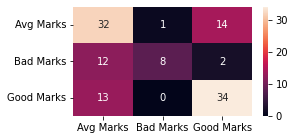

In [28]:
from sklearn.neural_network import MLPClassifier
MLPM = MLPClassifier(max_iter=10000)
MLPM.fit(X_train, y_train.values.ravel())
y_pred = MLPM.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']],
                  columns = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']])
plt.figure(figsize = (4,2))
sn.heatmap(df_cm, annot=True, fmt='g')

# Cross Validation with Shuffle Split 10

In [29]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(MLPClassifier(max_iter=10000),X,y.values.ravel(),scoring='f1_macro',cv=cv)).mean()

0.5556265542267484

In [30]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(MLPClassifier(max_iter=10000),X,y.values.ravel(),scoring='accuracy',cv=cv)).mean()

0.6189655172413794

# KNN Classifier

              precision    recall  f1-score   support

   Avg-Marks       0.45      0.87      0.59        47
   Bad-Marks       0.38      0.14      0.20        22
  Good-Marks       0.75      0.26      0.38        47

    accuracy                           0.48       116
   macro avg       0.52      0.42      0.39       116
weighted avg       0.56      0.48      0.43       116



<AxesSubplot:>

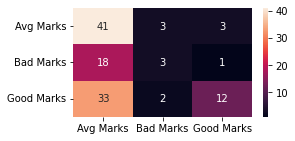

In [31]:
""" KNN Classifier """

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train.values.ravel())
y_pred = neigh.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']],
                  columns = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']])
plt.figure(figsize = (4,2))
sn.heatmap(df_cm, annot=True, fmt='g')


# Cross Validation with Shuffle Split 10

In [32]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(KNeighborsClassifier(n_neighbors=1),X,y.values.ravel(),scoring='f1_macro',cv=cv)).mean()

0.39791983410088283

In [33]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(KNeighborsClassifier(n_neighbors=1),X,y.values.ravel(),scoring='accuracy',cv=cv)).mean()

0.45517241379310347

<h3>Knn with 1-50 neighbors</h3>

              precision    recall  f1-score   support

   Avg-Marks       0.44      0.57      0.50        47
   Bad-Marks       0.31      0.18      0.23        22
  Good-Marks       0.54      0.47      0.50        47

    accuracy                           0.46       116
   macro avg       0.43      0.41      0.41       116
weighted avg       0.45      0.46      0.45       116

              precision    recall  f1-score   support

   Avg-Marks       0.45      0.87      0.59        47
   Bad-Marks       0.38      0.14      0.20        22
  Good-Marks       0.75      0.26      0.38        47

    accuracy                           0.48       116
   macro avg       0.52      0.42      0.39       116
weighted avg       0.56      0.48      0.43       116

              precision    recall  f1-score   support

   Avg-Marks       0.49      0.72      0.58        47
   Bad-Marks       0.50      0.09      0.15        22
  Good-Marks       0.64      0.57      0.61        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.43      0.68      0.52        47
   Bad-Marks       1.00      0.05      0.09        22
  Good-Marks       0.60      0.51      0.55        47

    accuracy                           0.49       116
   macro avg       0.68      0.41      0.39       116
weighted avg       0.61      0.49      0.45       116

              precision    recall  f1-score   support

   Avg-Marks       0.41      0.66      0.51        47
   Bad-Marks       1.00      0.05      0.09        22
  Good-Marks       0.50      0.43      0.46        47

    accuracy                           0.45       116
   macro avg       0.64      0.38      0.35       116
weighted avg       0.56      0.45      0.41       116

              precision    recall  f1-score   support

   Avg-Marks       0.43      0.70      0.53        47
   Bad-Marks       1.00      0.05      0.09        22
  Good-Marks       0.58      0.47      0.52        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.43      0.66      0.52        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.57      0.53      0.55        47

    accuracy                           0.48       116
   macro avg       0.33      0.40      0.36       116
weighted avg       0.40      0.48      0.43       116

              precision    recall  f1-score   support

   Avg-Marks       0.41      0.64      0.50        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.55      0.49      0.52        47

    accuracy                           0.46       116
   macro avg       0.32      0.38      0.34       116
weighted avg       0.39      0.46      0.41       116

              precision    recall  f1-score   support

   Avg-Marks       0.41      0.66      0.50        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.55      0.47      0.51        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.43      0.66      0.52        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.59      0.55      0.57        47

    accuracy                           0.49       116
   macro avg       0.34      0.40      0.36       116
weighted avg       0.41      0.49      0.44       116

              precision    recall  f1-score   support

   Avg-Marks       0.43      0.70      0.54        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.62      0.53      0.57        47

    accuracy                           0.50       116
   macro avg       0.35      0.41      0.37       116
weighted avg       0.43      0.50      0.45       116

              precision    recall  f1-score   support

   Avg-Marks       0.43      0.68      0.52        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.59      0.51      0.55        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hppav\AppData\Local\Temp\ipykernel_5504\4276736186.py:1

              precision    recall  f1-score   support

   Avg-Marks       0.43      0.68      0.52        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.61      0.53      0.57        47

    accuracy                           0.49       116
   macro avg       0.35      0.40      0.36       116
weighted avg       0.42      0.49      0.44       116

              precision    recall  f1-score   support

   Avg-Marks       0.44      0.66      0.53        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.60      0.57      0.59        47

    accuracy                           0.50       116
   macro avg       0.35      0.41      0.37       116
weighted avg       0.42      0.50      0.45       116

              precision    recall  f1-score   support

   Avg-Marks       0.44      0.70      0.54        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.61      0.53      0.57        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.46      0.72      0.56        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.62      0.55      0.58        47

    accuracy                           0.52       116
   macro avg       0.36      0.43      0.38       116
weighted avg       0.44      0.52      0.46       116

              precision    recall  f1-score   support

   Avg-Marks       0.48      0.74      0.58        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.65      0.60      0.62        47

    accuracy                           0.54       116
   macro avg       0.38      0.45      0.40       116
weighted avg       0.46      0.54      0.49       116

              precision    recall  f1-score   support

   Avg-Marks       0.45      0.72      0.56        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.63      0.55      0.59        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.47      0.79      0.59        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.68      0.55      0.61        47

    accuracy                           0.54       116
   macro avg       0.39      0.45      0.40       116
weighted avg       0.47      0.54      0.49       116

              precision    recall  f1-score   support

   Avg-Marks       0.45      0.79      0.57        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.65      0.47      0.54        47

    accuracy                           0.51       116
   macro avg       0.37      0.42      0.37       116
weighted avg       0.44      0.51      0.45       116



D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.46      0.77      0.57        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.62      0.49      0.55        47

    accuracy                           0.51       116
   macro avg       0.36      0.42      0.37       116
weighted avg       0.44      0.51      0.45       116

              precision    recall  f1-score   support

   Avg-Marks       0.45      0.72      0.55        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.60      0.51      0.55        47

    accuracy                           0.50       116
   macro avg       0.35      0.41      0.37       116
weighted avg       0.42      0.50      0.45       116

              precision    recall  f1-score   support

   Avg-Marks       0.46      0.74      0.57        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.62      0.53      0.57        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.47      0.77      0.59        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.65      0.55      0.60        47

    accuracy                           0.53       116
   macro avg       0.37      0.44      0.39       116
weighted avg       0.46      0.53      0.48       116

              precision    recall  f1-score   support

   Avg-Marks       0.49      0.79      0.60        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.70      0.60      0.64        47

    accuracy                           0.56       116
   macro avg       0.40      0.46      0.42       116
weighted avg       0.48      0.56      0.50       116

              precision    recall  f1-score   support

   Avg-Marks       0.47      0.79      0.59        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.68      0.55      0.61        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

   Avg-Marks       0.47      0.81      0.60        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.69      0.53      0.60        47

    accuracy                           0.54       116
   macro avg       0.39      0.45      0.40       116
weighted avg       0.47      0.54      0.49       116

              precision    recall  f1-score   support

   Avg-Marks       0.47      0.81      0.60        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.69      0.53      0.60        47

    accuracy                           0.54       116
   macro avg       0.39      0.45      0.40       116
weighted avg       0.47      0.54      0.49       116

              precision    recall  f1-score   support

   Avg-Marks       0.45      0.81      0.58        47
   Bad-Marks       0.00      0.00      0.00        22
  Good-Marks       0.69      0.47      0.56        47

    accuracy        

D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\FYP\All python\env\lib\site-packages\sklearn\metrics\_classif

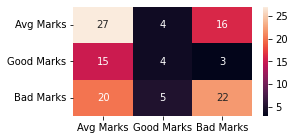

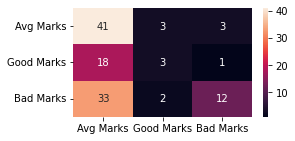

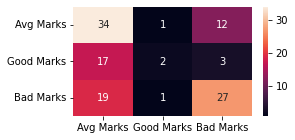

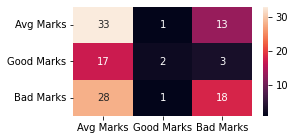

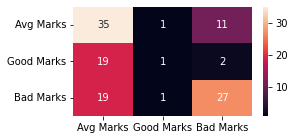

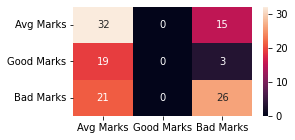

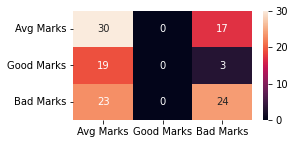

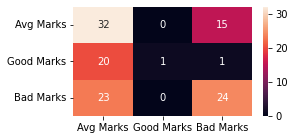

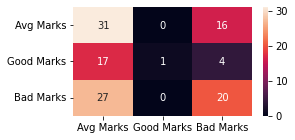

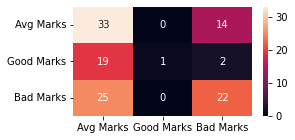

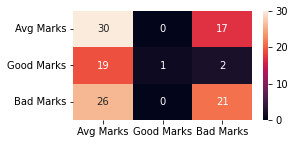

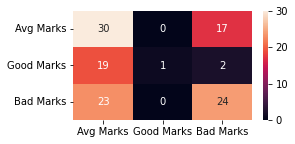

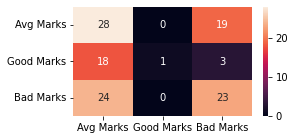

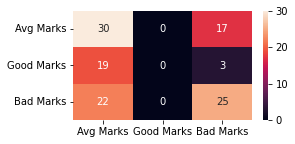

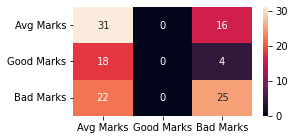

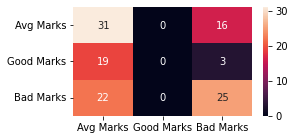

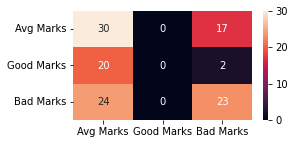

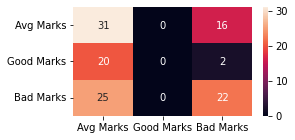

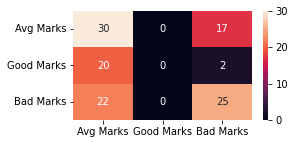

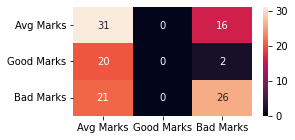

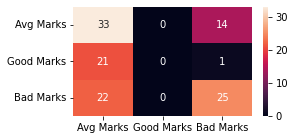

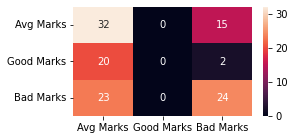

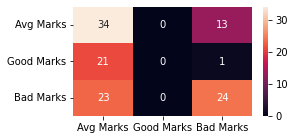

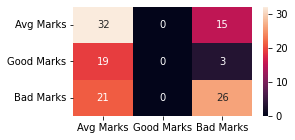

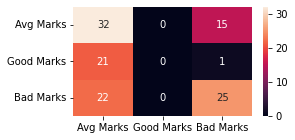

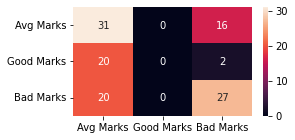

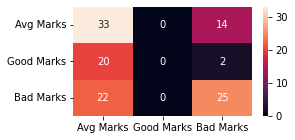

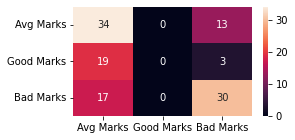

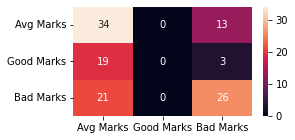

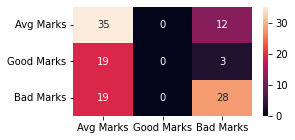

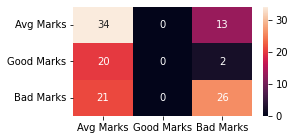

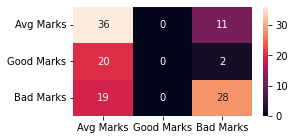

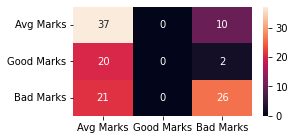

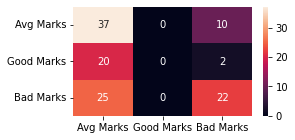

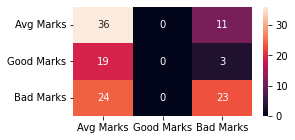

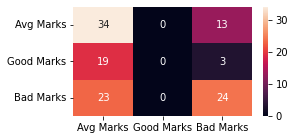

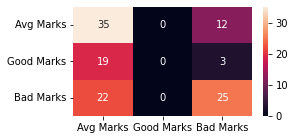

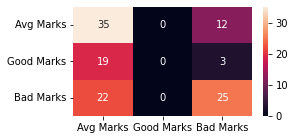

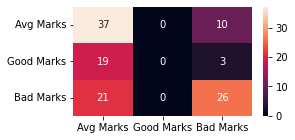

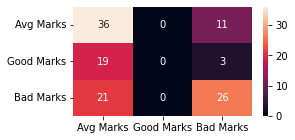

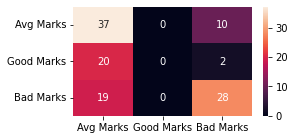

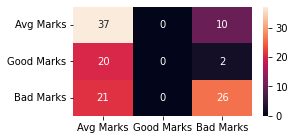

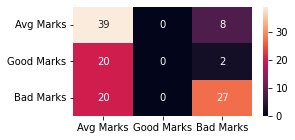

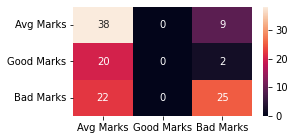

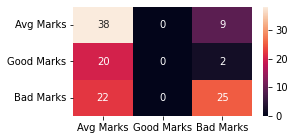

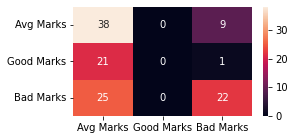

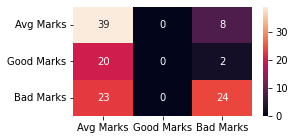

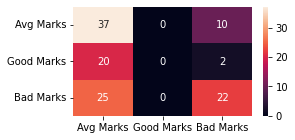

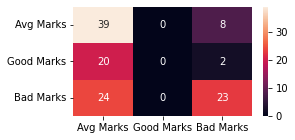

In [34]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,50):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train.values.ravel())
  y_pred = neigh.predict(X_test)
  print(metrics.classification_report(y_test,y_pred))
  df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in ['Avg Marks','Good Marks','Bad Marks']],
                  columns = [i for i in ['Avg Marks','Good Marks','Bad Marks']])
  plt.figure(figsize = (4,2))
  sn.heatmap(df_cm, annot=True, fmt='g')

# Naive Bayes Classifier

              precision    recall  f1-score   support

   Avg-Marks       0.66      0.70      0.68        47
   Bad-Marks       0.74      0.64      0.68        22
  Good-Marks       0.79      0.79      0.79        47

    accuracy                           0.72       116
   macro avg       0.73      0.71      0.72       116
weighted avg       0.73      0.72      0.72       116



<AxesSubplot:>

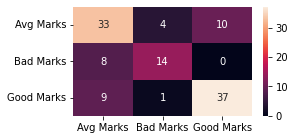

In [35]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
y_pred = gnb.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']],
                  columns = [i for i in [ 'Avg Marks','Bad Marks','Good Marks']])
plt.figure(figsize = (4,2))
sn.heatmap(df_cm, annot=True, fmt='g')

# Cross Validation with Shuffle Split 10

In [36]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(GaussianNB(),X,y.values.ravel(),scoring='f1_macro',cv=cv)).mean()

0.6169207313805352

In [37]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(GaussianNB(),X,y.values.ravel(),scoring='accuracy',cv=cv)).mean()

0.6491379310344827

# Support Vector Classifier

              precision    recall  f1-score   support

   Avg-Marks       0.69      0.81      0.75        47
   Bad-Marks       0.93      0.59      0.72        22
  Good-Marks       0.83      0.83      0.83        47

    accuracy                           0.78       116
   macro avg       0.82      0.74      0.77       116
weighted avg       0.79      0.78      0.78       116



<AxesSubplot:>

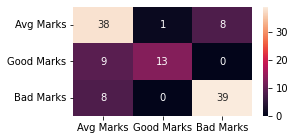

In [38]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
clf = SVC(C= 1000, gamma= 0.01, kernel= 'rbf')
clf.fit(X_train, y_train.values.ravel())
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test,y_pred))

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index = [i for i in ['Avg Marks','Good Marks','Bad Marks']],
                  columns = [i for i in ['Avg Marks','Good Marks','Bad Marks']])
plt.figure(figsize = (4,2))
sn.heatmap(df_cm, annot=True, fmt='g')



# Cross Validation with Shuffle Split 10

In [39]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(SVC(C= 1000, gamma= 0.01, kernel= 'rbf'),X,y.values.ravel(),scoring='f1_macro',cv=cv)).mean()

0.6775379226645459

In [40]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=9)
(cross_val_score(SVC(C= 1000, gamma= 0.01, kernel= 'rbf'),X,y.values.ravel(),scoring='accuracy',cv=cv)).mean()

0.7129310344827586

# Search CV Grid

<h3> Random Forest Classifier </h3>

In [41]:


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# rfc=RandomForestClassifier()

# param_grid = { 
#     'n_estimators': [50,60,70,80,90,100,150,200],
#     'max_features': [ 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 7)
# CV_rfc.fit(X_train, y_train.values.ravel())
# CV_rfc.best_params_

# {'criterion': 'gini',
#  'max_depth': 8,
#  'max_features': 'sqrt',
#  'n_estimators': 90}



<h3> Decision Tree Classifier </h3>

In [42]:
# clf = DecisionTreeClassifier()

# param_grid = { 
#     'max_leaf_nodes': list(range(2, 100)), 
#     'min_samples_split': [2, 3, 4]
# }

# CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 7)
# CV_clf.fit(X_train, y_train.values.ravel())
# CV_clf.best_params_


# {'max_leaf_nodes': 3, 'min_samples_split': 2}

<h3> SVC </h3>

In [43]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}

# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# grid.fit(X_train, y_train.values.ravel())
# grid.best_params_

# # {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}